<a href="https://colab.research.google.com/github/mgdjaxo/hans_huginn/blob/master/word2vec/gensim_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!mkdir data
!cp 'gdrive/My Drive/blog_notebooks/hotel-reviews.csv' 'data/hotel-reviews.csv'

In [4]:
!tail data/hotel-reviews.csv

In the end, we cancelled the remainder of our reservation and moved to the Westin a couple of blocks away. 
Perhaps it was just an off day for this hotel. We had such a positive experience last year, though, that my guess is that there has been a management change, and that the employees at the hotel are not treated well…so guest treatment suffers, too.",Firefox,Desktop,not happy
id49253,"We arrived late at night and walked in to a check-in area that had been completely flooded. There were fans running everywhere and water damage on the ceilings and walls. The computers didn't work at the front desk and they had to work from a computer in the back office. I only mention this because with these conditions,it would have been understandable if the two women behind the front desk had been unfriendly, but it was just the opposite. They were so nice and checked us in as quickly as possible.
The room was nice and clean. Breakfast was okay. Plenty of choices, but we got to breakfast kind of la

Imports package

In [0]:
import pandas , nltk
from gensim.models import Word2Vec
from nltk.tokenize import RegexpTokenizer

Load Data

In [0]:
filename = 'data/hotel-reviews.csv'
df = pandas.read_csv(filename, sep=',')

In [7]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [10]:
def nltk_tokenizer(_wd):
  return RegexpTokenizer(r'\w+').tokenize(_wd.lower())

df['Token_Description'] = df['Description'].apply(nltk_tokenizer)
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Token_Description
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,"[the, room, was, kind, of, clean, but, had, a,..."
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,"[i, stayed, at, the, crown, plaza, april, apri..."
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,"[i, booked, this, hotel, through, hotwire, at,..."
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,"[stayed, here, with, husband, and, sons, on, t..."
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,"[my, girlfriends, and, i, stayed, here, to, ce..."


Check Data

In [11]:
tokens = [ t for d in df['Token_Description'] for t in d]
text = nltk.Text(tokens, name='hotel_review')
print(len(text.tokens))
print(len(set(text.tokens)))

6145391
46049


In [0]:
print(text.vocab().most_common(10))

[('the', 403078), ('and', 214288), ('a', 177061), ('to', 158096), ('was', 134670), ('i', 113531), ('in', 102558), ('we', 88145), ('of', 84152), ('is', 76156)]


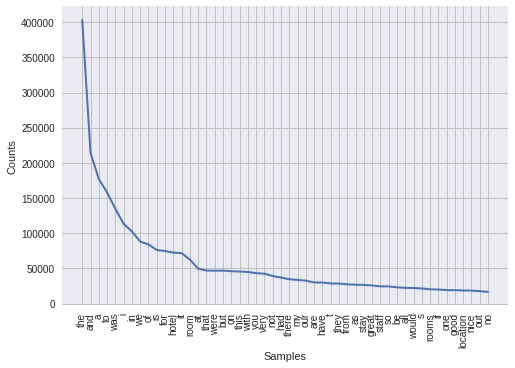

In [0]:
text.plot(50)

In [0]:
# tagged=nltk.pos_tag(tokens)
# allnoun=[word for word,pos in tagged if pos in ['NN','NNP']]

In [0]:
lower_cnt = int(len(set(text.tokens)) * 0.01) * -1
print(text.vocab().most_common()[:lower_cnt:-1])

[('chong', 1), ('cheech', 1), ('hl', 1), ('normal_illinois', 1), ('bloomington_normal_marriott_hotel_conference_center', 1), ('showuserreviews', 1), ('doble', 1), ('shipyard', 1), ('ofthem', 1), ('peacemaker', 1), ('inida', 1), ('doorguys', 1), ('ruthie', 1), ('hysterically', 1), ('demonic', 1), ('bawled', 1), ('lawerence', 1), ('tcu', 1), ('unfortunetely', 1), ('rebooking', 1), ('guerro', 1), ('snarl', 1), ('stereotypically', 1), ('yanking', 1), ('conformtable', 1), ('penhaligon', 1), ('mcenery', 1), ('habitation', 1), ('gearing', 1), ('beignet', 1), ('feasted', 1), ('tobie', 1), ('reubens', 1), ('pastami', 1), ('bestbi', 1), ('riko', 1), ('waitrose', 1), ('intrusiveness', 1), ('sandalwood', 1), ('lindberg', 1), ('condesending', 1), ('enriching', 1), ('slightiest', 1), ('definitevely', 1), ('gratified', 1), ('applicability', 1), ('cityline', 1), ('zanzibar', 1), ('sittiing', 1), ('oildrill', 1), ('cowyboy', 1), ('sulhpur', 1), ('qua', 1), ('tutto', 1), ('benash', 1), ('carnegies', 1),

In [0]:
common_texts = df['Token_Description'].tolist()

model = Word2Vec(
    common_texts,
    size=150,
    alpha=0.025,
    window=10,
    min_count=2,
    sg=1)

model.train(common_texts, total_examples=len(common_texts), epochs=10)

(43610566, 61453910)

In [0]:
model.wv.most_similar("france")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sweden', 0.5012258887290955),
 ('novotels', 0.499895840883255),
 ('waldolf', 0.49672961235046387),
 ('aman', 0.49654629826545715),
 ('brisbane', 0.49461251497268677),
 ('nerds', 0.48636797070503235),
 ('palaces', 0.48525434732437134),
 ('funkiest', 0.4837770462036133),
 ('haestens', 0.4791772663593292),
 ('purring', 0.4785471260547638)]

In [0]:
model.wv.most_similar("korea")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('larges', 0.626193642616272),
 ('graumans', 0.6216803193092346),
 ('nyma', 0.6206377744674683),
 ('locust', 0.6156489849090576),
 ('chineese', 0.6107164621353149),
 ('waling', 0.6060813665390015),
 ('greenwhich', 0.6023654937744141),
 ('rockefellar', 0.5982553958892822),
 ('intersect', 0.5955333113670349),
 ('olivera', 0.5953435897827148)]

In [0]:
model.wv.most_similar("clean")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('spotless', 0.7565671801567078),
 ('deocrated', 0.7326547503471375),
 ('comfortable', 0.7001372575759888),
 ('spacious', 0.6978444457054138),
 ('tidy', 0.6951659321784973),
 ('immaculate', 0.6759884357452393),
 ('revive', 0.6696084141731262),
 ('sleekly', 0.6625135540962219),
 ('specious', 0.6589911580085754),
 ('spottlessly', 0.6520050764083862)]

In [0]:
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sheets', 0.7050168514251709),
 ('comforter', 0.6948769092559814),
 ('pillows', 0.6872971057891846),
 ('duvet', 0.6672518253326416),
 ('featherbed', 0.6645382046699524),
 ('mattress', 0.6613062024116516),
 ('blanket', 0.647439181804657),
 ('feather', 0.6237695217132568),
 ('sheeted', 0.6193832159042358),
 ('comfortor', 0.6074461340904236)]